# **INDEPENDENT PROJECT 9: Investigation of usage of blue-cars in Paris for the Autolib Company**

## Research question
Working as a data scientist for the Autolib electric car-sharing service company, we are tasked to investigate the following claim about the usage of blue-car(a category of electric cars) in Paris. 

> *  Investigate the claim that the mean of the number of blue cars taken in any 2 sets of random sample stations is 120 


Here is the data report link (https://docs.google.com/document/d/1QtRw-uAR2f9Irye3DUnTEFhpy0MZAxfZw7xfd0lAk_o/edit?usp=sharing)


### Metric for Success
*    The metric for success is being able to give satisfactory information that answers the research requirement stated above. 

## Experiment design


*    Data Cleaning
*    Exploratory Data Analysis
*    Univariate, Bivariate Analysis
*    Visualizations
*    Testing a Hypothesis
*    Challenge our solution by providing insights on how we can make improvements.
   

## 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Data from the source i.e. csv
# ---
data = '/content/autolib_daily_events_postal_code.csv'
# ---
# 
pariscars = pd.read_csv(data)


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
pariscars.shape

(16085, 13)

In [ ]:
# Previewing the top of our dataset
#
pariscars.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
# 
pariscars.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
pariscars.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Checking the unique values of the columns we are interested in
# the day of the week
pariscars['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
pariscars['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
# Postal codes(which will later be translated into stations)
pariscars['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


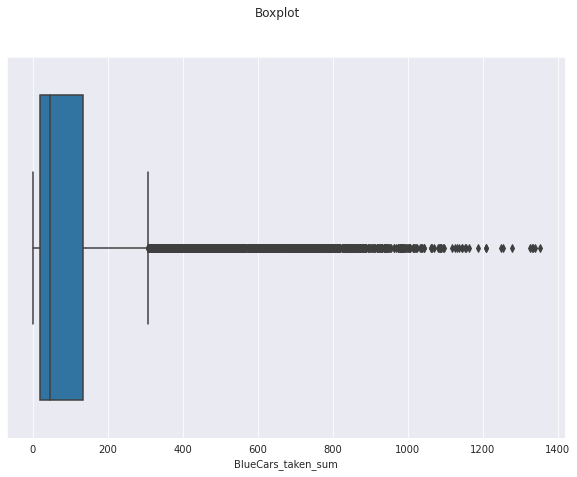

In [ ]:
# Checking for Outliers in the column of interest.
fig, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.boxplot(pariscars['BlueCars_taken_sum'], ax=ax1)

fig.suptitle('Boxplot')
plt.show()
# There are too many outliers outliers
# For now we will not drop them because they are valid observations and form a significant proportion of the data.

In [ ]:
# Checking for Anomalies
#
pariscars.duplicated().sum()
# no duplicates

0

In [ ]:
# Identifying the Missing Data
#
pariscars.isnull().sum()
# no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# More data cleaning procedures
# Removing unnecessary columns
pariscars = pariscars.drop('n_daily_data_points', axis = 1)
pariscars = pariscars.drop('date', axis = 1)
pariscars = pariscars.drop('BlueCars_returned_sum', axis = 1)
pariscars = pariscars.drop('Utilib_taken_sum', axis = 1)
pariscars = pariscars.drop('Utilib_returned_sum', axis = 1)
pariscars = pariscars.drop('Utilib_14_taken_sum', axis = 1)
pariscars = pariscars.drop('Utilib_14_returned_sum', axis = 1)
pariscars = pariscars.drop('Slots_freed_sum', axis = 1)
pariscars = pariscars.drop('Slots_taken_sum', axis = 1)
pariscars.head()


,Postal code,dayOfWeek,day_type,BlueCars_taken_sum
0,75001,0,weekday,110
1,75001,1,weekday,98
2,75001,2,weekday,138
3,75001,3,weekday,104
4,75001,4,weekday,114


In [ ]:
# remaning the columns.
columns = ['postal_code', 'day_of_week', 'day_type', 'BC_taken']
pariscars.columns = columns
pariscars.head()

,postal_code,day_of_week,day_type,BC_taken
0,75001,0,weekday,110
1,75001,1,weekday,98
2,75001,2,weekday,138
3,75001,3,weekday,104
4,75001,4,weekday,114


In [ ]:
# At this point we need to understand our sample in order to work further. 
# We need a random sample of blue cars borrowed 

# We will use simple random sampling

In [ ]:
# Sample Size formula for a known population.

# Sample Size n = N * [Z**2 * p * (1-p)/e**2] / [N – 1 + (Z**2 * p * (1-p)/e**2]

# N = Population size,
# Z = Critical value of the normal distribution at the required confidence level,
# p = Sample proportion,
# e = Margin of error

N = 16085
Z = 1.96 # alpha = 0.05
p = 0.5
e = 0.05

nu = (1.96** 2)*0.5*(1-0.5)/(0.05**2)
den = (16085 - 1) + nu

n = N * (nu/den)
print(n)

# Sample size = 375.

375.2218584225559


In [ ]:
# Finding means and standard deviations of the population of taken blue cars.
mu = pariscars['BC_taken'].mean()
print(mu)

125.92695057506994


In [ ]:
sigma = pariscars['BC_taken'].std()
print(sigma)

185.42657876727893


In [ ]:
# Selecting our sample
sample = (pariscars['BC_taken']).sample(n = 375, replace="False")
print(sample)

733      189
8557      23
5197      75
9601     155
4491     113
        ... 
12969     87
4870      62
5870      86
2622     731
12363     63
Name: BC_taken, Length: 375, dtype: int64


In [ ]:
sampling = pd.DataFrame(sample)
sampling.head()

,BC_taken
733,189
8557,23
5197,75
9601,155
4491,113


In [ ]:
x̄ = sampling['BC_taken'].mean()
print(x̄)

121.632


## 6. Exploratory Analysis

## Univariate analysis



In [ ]:
pariscars.describe()

,postal_code,day_of_week,BC_taken
count,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951
std,7647.342000,2.008378,185.426579
min,75001.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000
50%,92340.000000,3.000000,46.000000
75%,93400.000000,5.000000,135.000000
max,95880.000000,6.000000,1352.000000


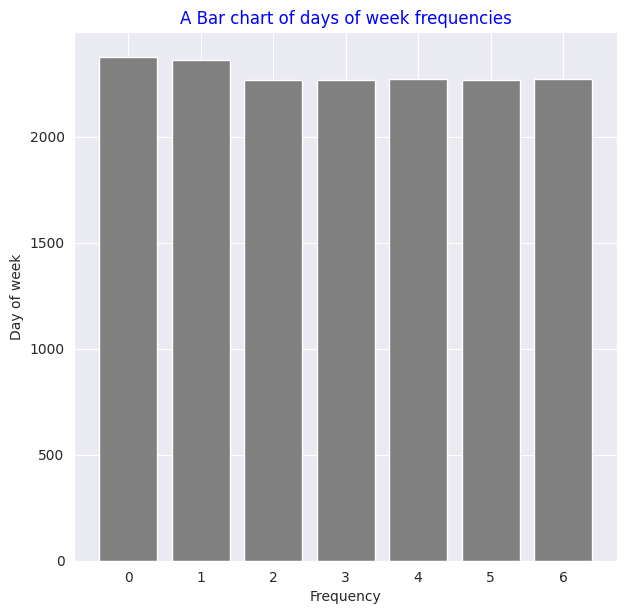

In [ ]:

days = pariscars.day_of_week.value_counts()
days

# accessing the data to plot

# labels
sizes= days.index
sizes

# values
data = days.values
data

# plotting
plt.figure(figsize = (7,7), dpi = 100)
plt.bar(sizes, data, color = 'grey')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of days of week frequencies", color = 'blue')
plt.show()
# 0 = Monday
# 1 = Tuesday
# 2 = Wednesday
# 3 = Thursday
# 4 = Friday
# 5 = Saturday
# 6 = Sunday

# The day with the most number of Bluecar borrowings is Monday.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


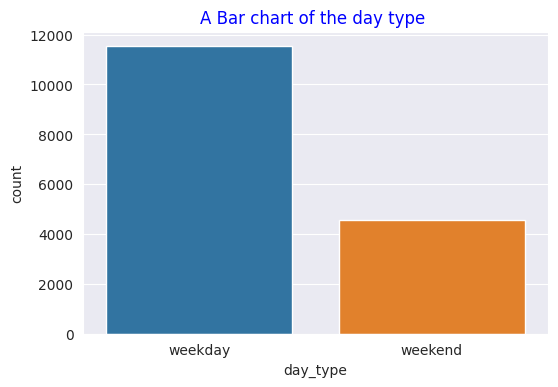

In [ ]:
# Histogram of the daytype sum

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(pariscars.day_type)
plt.title('A Bar chart of the day type ', color = 'blue')
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


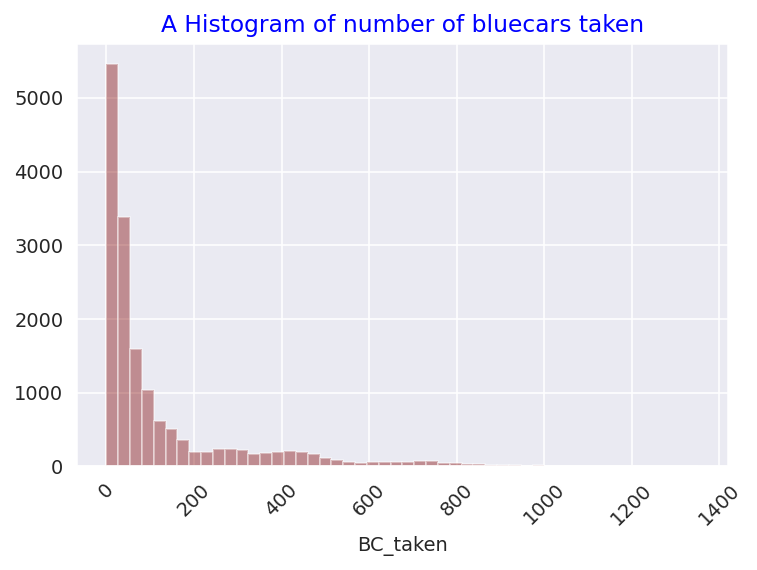

In [ ]:
# Histogram of the bluecars_taken sum

plt.figure(dpi = 140)
sns.set_style("darkgrid")
sns.distplot(pariscars["BC_taken"], kde = False, color = 'maroon')
plt.title("A Histogram of number of bluecars taken", color = 'blue')
plt.xticks(rotation = 45)
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side

In [ ]:
pariscars.groupby('day_of_week')[['BC_taken']].count()

,BC_taken
day_of_week,
0,2374
1,2363
2,2268
3,2268
4,2271
5,2267
6,2274


## Bivariate analysis

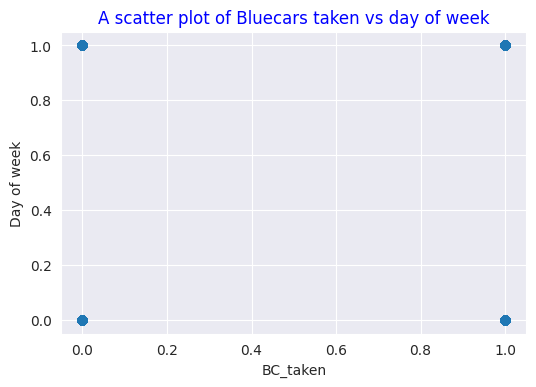

In [ ]:
# Scatterplot showing relation between day being Monday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] == 0)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs day of week', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Monday and the car taken.
day_vs_cars_corr = (pariscars['day_of_week'] == 0).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr)
# There is almost no correlation although it is slightly to the negative but very weakly.

-0.017512532989167925


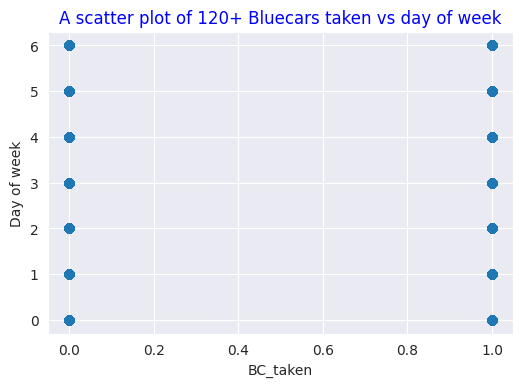

In [ ]:
# Scatterplot showing relation between day being Tuesday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'])

# Giving the scatterplot a title
plt.title('A scatter plot of 120+ Bluecars taken vs day of week', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Tuesday and the car taken.
day_vs_cars_corr1 = (pariscars['day_of_week'] == 1).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr1)
# There is almost no correlation although it is slightly to the negative but very weakly.

-0.022725671366204063


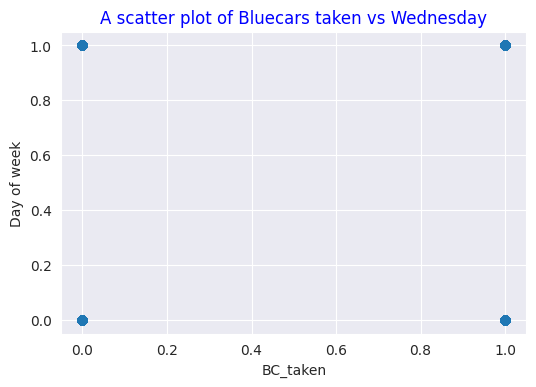

In [ ]:
# Scatterplot showing relation between day being Wednesday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] ==2)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs Wednesday', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Wednesday and the car taken.
day_vs_cars_corr2 = (pariscars['day_of_week'] == 2).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr2)
# There is almost no correlation although it is slightly to the negative but very weakly.

-0.010034749823698876


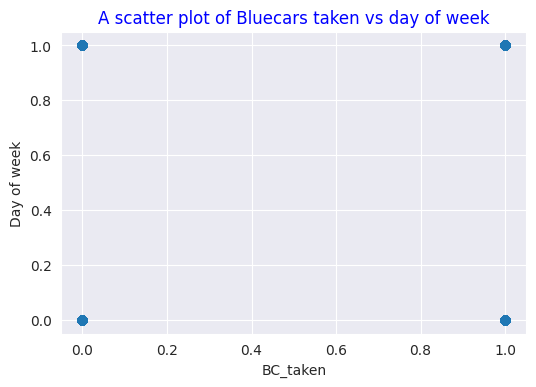

In [ ]:
# Scatterplot showing relation between day being Thurday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] == 3)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs day of week', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Thursday and the car taken.
day_vs_cars_corr3 = (pariscars['day_of_week'] == 3).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr3)
# There is almost no correlation although it is slightly to the negative but very weakly.

-0.006806586946229331


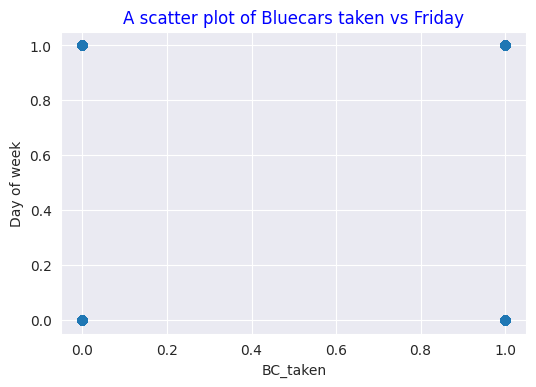

In [ ]:
# Scatterplot showing relation between day being Friday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] == 4)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs Friday', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Friday and the car taken.
day_vs_cars_corr4 = (pariscars['day_of_week'] == 4).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr4)
# There is almost no correlation although it is slightly to the positive but very weakly.

0.004165761364123212


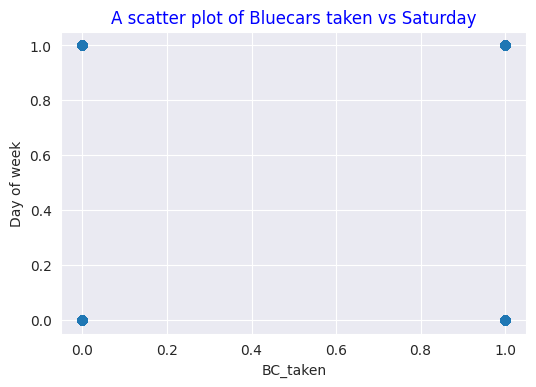

In [ ]:
# Scatterplot showing relation between day being Saturday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] == 5)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs Saturday', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Saturday and the car taken.
day_vs_cars_corr5 = (pariscars['day_of_week'] == 5).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr5)
# There is almost no correlation although it is slightly to the positive but very weakly.

0.030834462793215202


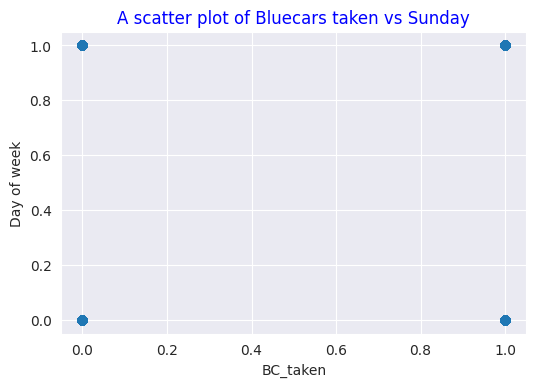

In [ ]:
# Scatterplot showing relation between day being Sunday and more than 120 cars being taken
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(pariscars['BC_taken'] > 120, pariscars['day_of_week'] == 6)

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs Sunday', color = 'blue')

# Labelling the x axis
plt.xlabel('BC_taken')

# Labelling the y axis
plt.ylabel('Day of week')

# We then display our scatterplot 
plt.show()

In [ ]:
# Calculating correlation of day of the week being Sunday and the car taken.
day_vs_cars_corr6 = (pariscars['day_of_week'] == 6).corr(pariscars['BC_taken'] > 120, method = 'pearson')
print(day_vs_cars_corr6)
# There is almost no correlation although it is slightly to the positive but very weakly.

0.022784435705760584


*    Sunday, Saturday and Friday are the only days of the week that show a positive correlation with borrowed cars being above 120

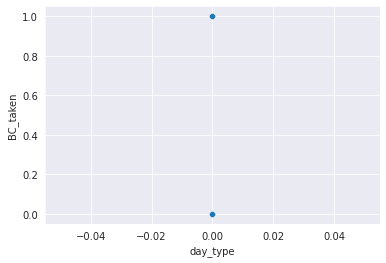

In [ ]:
# # Scatterplot showing relation between daytype being weekday and more than 120 cars being taken

sns.scatterplot(x = pariscars['day_type'] == 1, y = pariscars['BC_taken'] > 120)

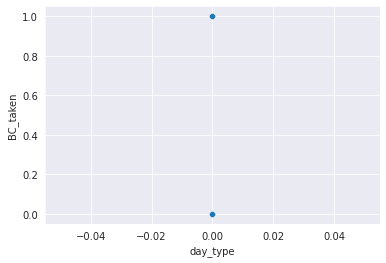

In [ ]:
# # Scatterplot showing relation between daytype being weekend and more than 120 cars being taken

sns.scatterplot(x = pariscars['day_type'] == 2, y = pariscars['BC_taken'] > 120)

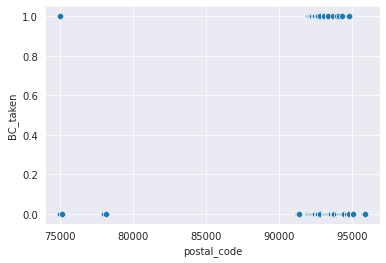

In [ ]:
sns.scatterplot(x = pariscars['postal_code'], y = pariscars['BC_taken'] > 120)

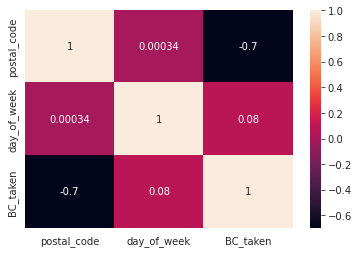

In [ ]:
# heatmap, showing a picture of how the features correlate. 
# Positive values indicate a positive correlation and vice versa.
sns.heatmap(pariscars.corr(),annot=True)
plt.show()

## 7. Implementing the Solution

In [ ]:
# Hypotheses

# Ho : the mean of borrowed blue cars is smaller or equal to 120
# H1 : the means of borrowed blue cars is greater than 120


In [ ]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
# Importing anderson function form scipy   β, 
from scipy.stats import anderson    

In [ ]:
# Creating a function for calculating t and z scores.
def score (μ,x̄,σ,n):
    
    if n>30: # Calculating Z Test score
        score = (μ - x̄)/((σ)/(n**0.5))
        print(f"This is the Z - Test Statistic: {score}, and this is the P-value:")
        prob = stats.norm.cdf(score)
   
    else: # Calculating T Test score
        score = (μ - x̄)/((σ)/((n-1)**0.5))
        print(f"\nThis is the T - Test Statistic: {score}, and this is the P-value:")
        pro = stats.norm.cdf(score)
        prob = (1 - pro)

    # prob = stats.norm.cdf(score)
    
    return prob

In [ ]:
# t Test for Hypothesis of the Mean of the sample
#
# h0 :mean <= 120
# h1 > 120  (claim)

μ = 125.926951
x̄ = 137.7869
n = 375
σ = 185.42657876727893
alpha = 0.05

score(μ,x̄,σ,n)

This is the Z - Test Statistic: -1.2385868646565052, and this is the P-value:


0.10774926750203506

In [ ]:
# The p_value is 10% which is greater than the significance value 5%
# This leads us to fail to reject the null hypothesis 

In [ ]:
# Point estimation attempt
# Here we specify our abitrary mean height and a standard deviation, which are loc and scale respectively
estimation_ = sampling[loc=120, scale=150]
print(estimation)  

#Calculate the population mean
#estimation.mean()

SyntaxError: ignored

In [ ]:
sampling = np.array(sampling['BC_taken'])
print(sampling)

[189  23  75 155 113 145  12 158   8  16  47  12  44 305  11 111  33  86
   3  11  71 147  96 358  33 793   5 225  12 846  23  12  17  51 134  66
  42   8 149 171  22 293  37  24  48 373   2  94  36 230  45  23   7 114
  53  32   7 132 813 108 156 261 444  15   4  30  72   7  62  15  15   3
   2  10  25  34  25 616  11   0  13 506   9  40  72  48 113 436 421  32
  21  43 104  42  30  30  40 897  11  55  11  24  28  45  71  67  76 256
  62 466 137  32  49  42  24   4  17  19 678  63 197 475 186   6 403   4
  28  46 171  14  30   7  39  44 624 437  29  33  33 114 138  28  98  27
  98 529 728 197  71 212 182  61  92  40  30   6  30 163 355  42  14 373
  13  23  88   9  35  24 303 355  11  81  39  69  56  10  18  43  15   3
 318  76 200  70  29   7 358 384  23 473  47 168  51 326  81 106 251   9
  65  58  49  65  17 145 938 495  55  73  39  56 303 200  48  44  28  37
  14  34  25 256  57 521  49  43  28 337 404  76  10  36  25 554 111 208
  43  21  63  32  99 371  32 104 118  65 857  76  7

In [ ]:
# Interval estimation

sample_mean = x̄
sample_mean

# Finding the sample size
#
sample_size = n
sample_size

# Finding the standard error of the mean of data 
#
std_error = sampling.std() / np.sqrt(n)
std_error

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# 120.2311 < mu < 155.3425

(120.23114474169826, 155.34265525830176)

## 9. Follow up questions

### a). Did we have the right data?
*     Yes

### b). Do we need other data to answer our question?

*   No, this dataset has given us enough data with regard to the research question



### c). Did we have the right question?
*    Yes. It was a suitable and valid question.